### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Badminton']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 15626    Badminton
15627    Badminton
15628    Badminton
15629    Badminton
15630    Badminton
           ...    
16094    Badminton
16095    Badminton
16096    Badminton
16097    Badminton
16098    Badminton
Name: Sport, Length: 473, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 15626    NA
15627    NA
15628    NA
15629    NA
15630    NA
         ..
16094    NA
16095    NA
16096    NA
16097    NA
16098    NA
Name: Medal, Length: 473, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 15626 to 16098
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      473 non-null    int64  
 1   Unnamed: 0_x    473 non-null    int64  
 2   ID              473 non-null    int64  
 3   Name            473 non-null    object 
 4   Sex             473 non-null    object 
 5   Age             473 non-null    float64
 6   Height          473 non-null    float64
 7   Weight          473 non-null    float64
 8   NOC             473 non-null    object 
 9   Games           473 non-null    object 
 10  Year            473 non-null    int64  
 11  Season          473 non-null    object 
 12  City            473 non-null    object 
 13  Sport           473 non-null    object 
 14  Event           473 non-null    object 
 15  Medal           473 non-null    object 
 16  Team            473 non-null    object 
 17  Unnamed: 0_y    473 non-null 

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (354, 1) (354, 6)
Test Set  : (119, 1) (119, 6)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
15878,19.0,74.000000,180.0,1.000000e+12,49050000.0,20387.359837,NA
15828,24.0,72.000000,180.0,2.920000e+12,64374990.0,45359.230347,NA
16058,35.0,81.000000,181.0,4.710000e+11,37948016.0,12411.716070,NA
16067,31.0,71.000000,183.0,2.310000e+11,27111069.0,8520.505038,NA
15853,31.0,74.674419,180.0,2.650000e+12,65637239.0,40373.422776,Bronze
...,...,...,...,...,...,...,...
15940,21.0,63.000000,173.0,2.730000e+11,223614649.0,1220.850249,NA
15661,36.0,75.000000,185.0,3.070000e+11,5731118.0,53567.209749,NA
15921,28.0,77.000000,175.0,7.420000e+11,30769700.0,24114.632252,NA
15996,29.0,60.000000,168.0,6.200000e+12,127629000.0,48578.301170,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        413
Gold       20
Bronze     20
Silver     20
Name: Medal, dtype: int64


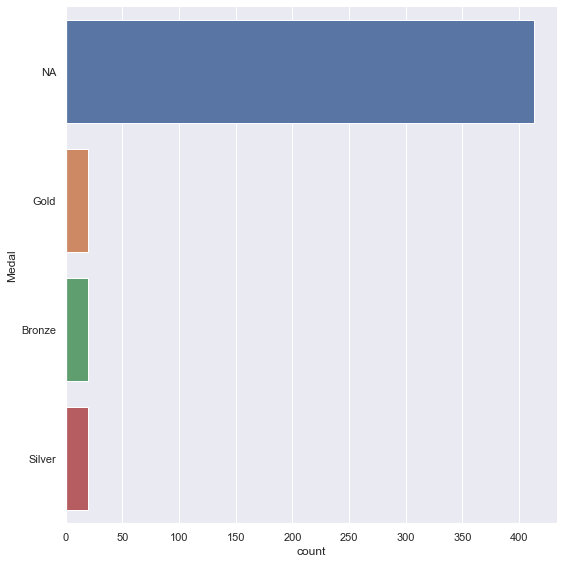

In [13]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(354, 6) (354, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1248, 6) (1248, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,19.000000,74.000000,180.000000,1.000000e+12,4.905000e+07,20387.359837,NA
1,24.000000,72.000000,180.000000,2.920000e+12,6.437499e+07,45359.230347,NA
2,35.000000,81.000000,181.000000,4.710000e+11,3.794802e+07,12411.716070,NA
3,31.000000,71.000000,183.000000,2.310000e+11,2.711107e+07,8520.505038,NA
4,31.000000,74.674419,180.000000,2.650000e+12,6.563724e+07,40373.422776,Bronze
...,...,...,...,...,...,...,...
1243,31.891675,75.000000,185.108325,3.270000e+11,5.591572e+06,58480.870853,Silver
1244,27.291900,65.167600,168.937850,1.760000e+11,2.115404e+08,831.992262,Silver
1245,28.129604,75.870396,183.212819,3.139441e+11,1.673077e+07,37174.542743,Silver
1246,26.556399,65.563988,174.233185,2.433243e+11,1.111921e+08,5667.724330,Silver


In [17]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
15741,24.0,78.0,181.0,4.600000e+12,1.324655e+09,3472.602300
15821,25.0,63.0,173.0,7.000000e+11,1.126136e+09,621.594673
15672,28.0,84.0,193.0,2.290000e+11,4.700170e+07,4872.164096
16023,28.0,80.0,182.0,2.120000e+12,6.270490e+07,33809.161667
15941,27.0,80.0,183.0,3.910000e+11,8.747358e+06,44699.210893
...,...,...,...,...,...,...
15783,26.0,86.0,192.0,1.120000e+13,1.378665e+09,8123.800923
15871,22.0,72.0,170.0,1.120000e+13,1.378665e+09,8123.800923
16032,26.0,59.0,174.0,1.260000e+11,6.295802e+07,2001.333555
15717,22.0,96.0,190.0,2.870000e+11,4.955757e+07,5791.244020


Number of Medal Types : 4
Bronze    312
Gold      312
NA        312
Silver    312
Name: Medal, dtype: int64


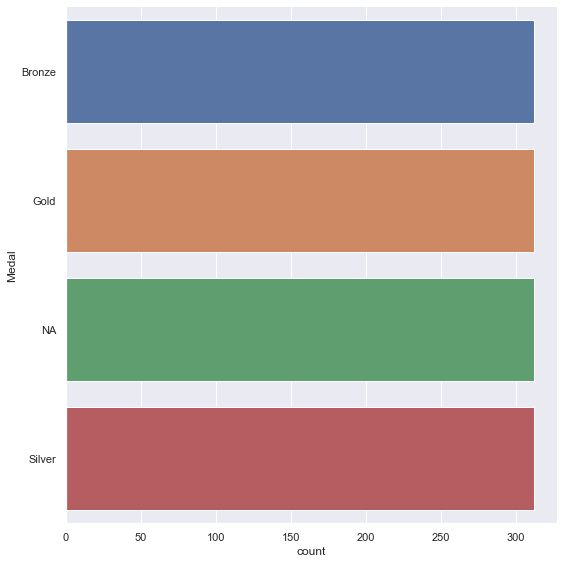

In [18]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (936, 1) (936, 6)
Test Set  : (312, 1) (312, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9957264957264957

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8814102564102564



<AxesSubplot:>

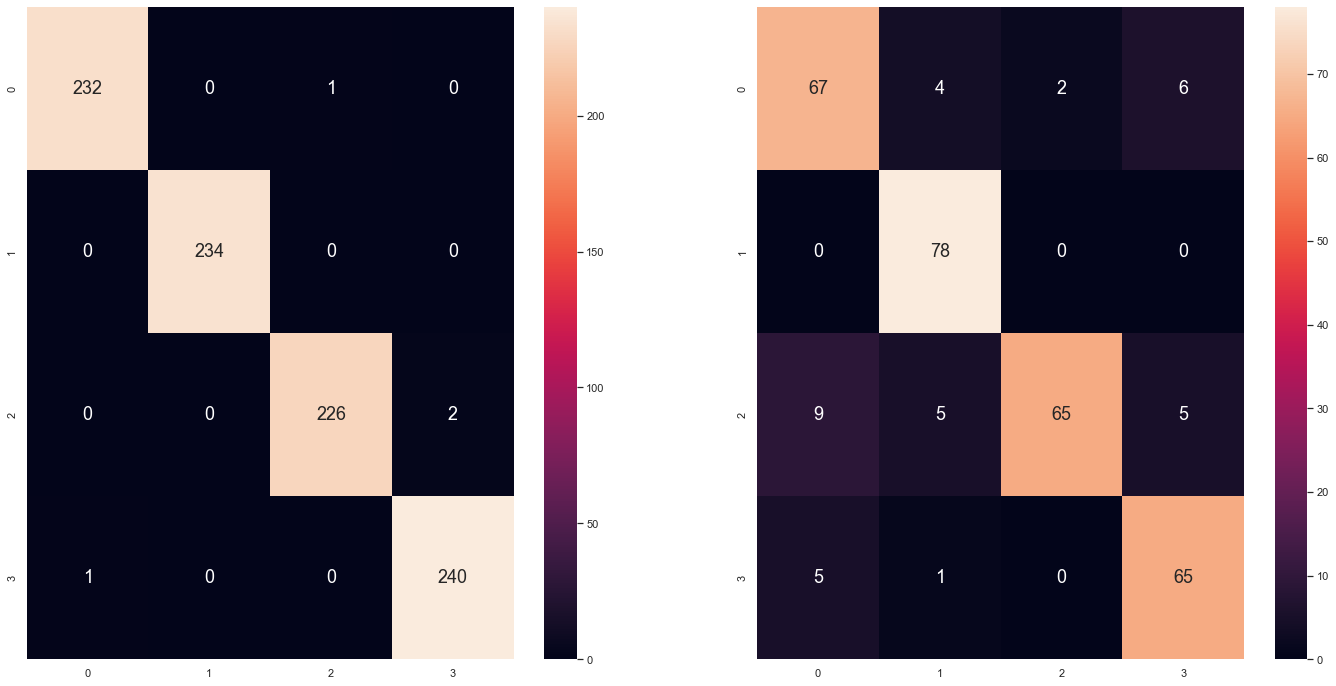

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 12)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

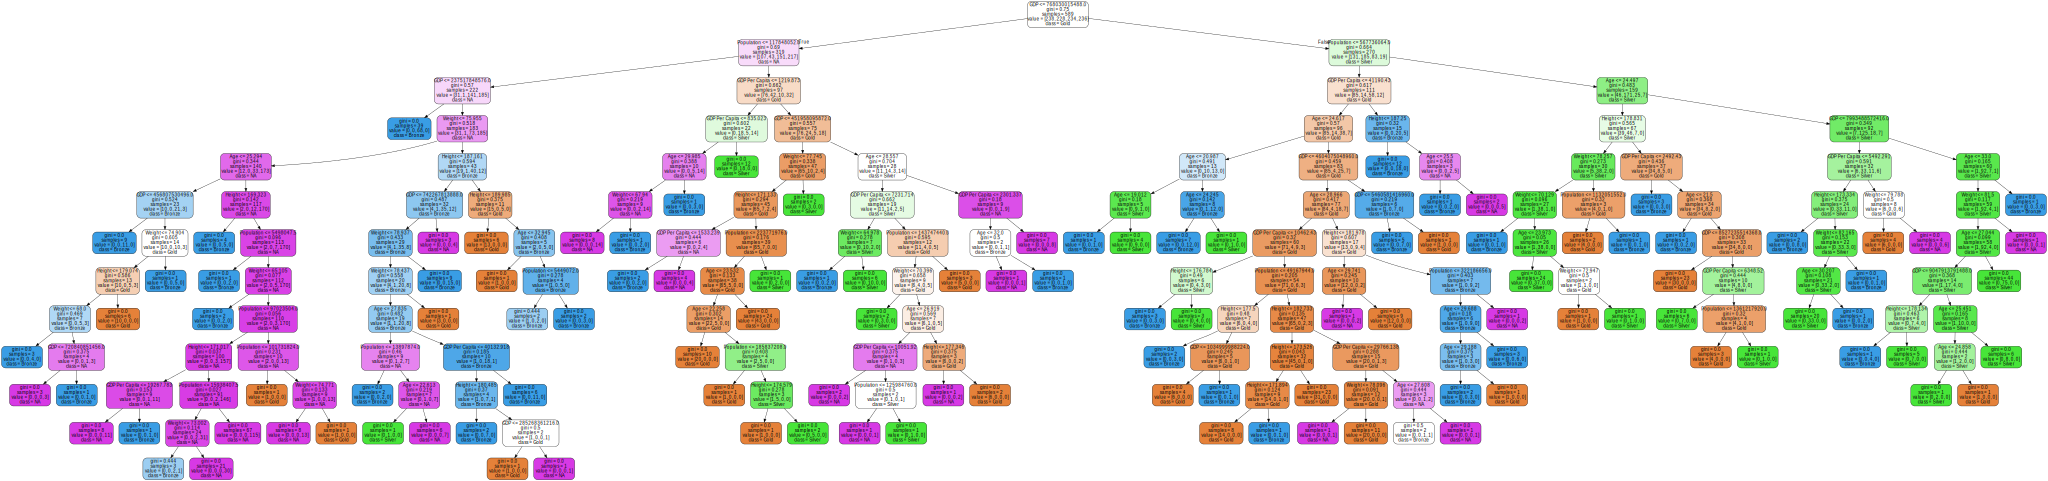

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
graph.render("Tree_male_BADMINTON")

'Tree_male_BADMINTON.pdf'

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.7478991596638656


<AxesSubplot:>

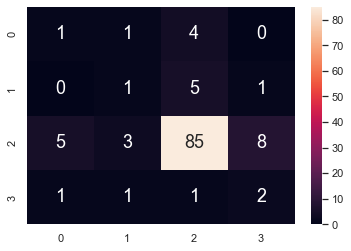

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})